In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


In [3]:
x_train, y_train = x_train_all[:50000], y_train_all[:50000]
x_valid, y_valid = x_train[:5000], y_train[:5000]
x_test, y_test = x_train_all[50000:], y_train_all[50000:]

In [4]:
# 必须是一维的
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train.reshape(-1,1)).reshape(-1,28,28)
x_valid_scale = scale.fit_transform(x_valid.reshape(-1,1)).reshape(-1,28,28)
x_test_scale = scale.fit_transform(x_test.reshape(-1,1)).reshape(-1,28,28)

In [5]:
# 定义模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train_scale, y_train, batch_size=32, epochs=10, validation_data=(x_valid_scale, y_valid))

Train on 50000 samples, validate on 5000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 57us/sample - loss: 0.5365 - accuracy: 0.8068 - val_loss: 0.4213 - val_accuracy: 0.8530
Epoch 2/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.4160 - accuracy: 0.8506 - val_loss: 0.3940 - val_accuracy: 0.8608
Epoch 3/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3819 - accuracy: 0.8639 - val_loss: 0.3468 - val_accuracy: 0.8788
Epoch 4/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3588 - accuracy: 0.8698 - val_loss: 0.3298 - val_accuracy: 0.8818
Epoch 5/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3421 - accuracy: 0.8753 - val_loss: 0.3223 - val_accuracy: 0.8818
Epoch 6/10
50000/50000 [==============================] - 2s 46us/sample - loss: 0.3287 - accuracy: 0.8790 - val_loss: 0.3170 - val_accuracy: 0.8822
Epoch 7/10
50000/50000 [==============================] -

   accuracy      loss  val_accuracy  val_loss
0   0.80678  0.536459        0.8530  0.421287
1   0.85058  0.415989        0.8608  0.394033
2   0.86392  0.381860        0.8788  0.346758
3   0.86984  0.358766        0.8818  0.329830
4   0.87534  0.342115        0.8818  0.322329
5   0.87902  0.328742        0.8822  0.317008
6   0.88476  0.316528        0.8918  0.292157
7   0.88898  0.305685        0.8998  0.277477
8   0.89146  0.296664        0.9002  0.278086
9   0.89408  0.287237        0.8950  0.279340


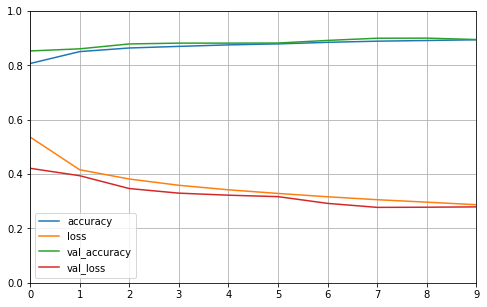

In [8]:
t = pd.DataFrame(history.history)
print(t)
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scale, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35389661079645157, 0.8711]